# ASSIGNMENT 2 - MCAR test

# Group No: 5

**1. Madhav Jivani(202201285)**

**2. Ritwik Agarwal(202411067)**

**3. Tarun Kumar(202312126)**


**github_link** = https://github.com/madhavJivani/EDA_ASSIGNMENT/tree/main/EDA_ASSIGNMENTS/Assignment-2

> [Contribution for this assignment : solely done by Madhav Jivani - 202201285]
> - May it be documentation part(regarding pdf)
> - May it be actual analysis via code
>

In [16]:
# Load the Dataset form csv files in local folder
import pandas as pd
import missingno as msno
df = pd.read_csv('Diabetes Missing Data.csv')
df.head()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [17]:
df.shape

(768, 9)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pregnant           768 non-null    int64  
 1   Glucose            763 non-null    float64
 2   Diastolic_BP       733 non-null    float64
 3   Skin_Fold          541 non-null    float64
 4   Serum_Insulin      394 non-null    float64
 5   BMI                757 non-null    float64
 6   Diabetes_Pedigree  768 non-null    float64
 7   Age                768 non-null    int64  
 8   Class              768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [4]:
# Check the data types of each column
print(df.dtypes)

Pregnant               int64
Glucose              float64
Diastolic_BP         float64
Skin_Fold            float64
Serum_Insulin        float64
BMI                  float64
Diabetes_Pedigree    float64
Age                    int64
Class                  int64
dtype: object


# Find Missing Values

In [19]:
missing_details = df.isnull().sum()
missing_details

Pregnant               0
Glucose                5
Diastolic_BP          35
Skin_Fold            227
Serum_Insulin        374
BMI                   11
Diabetes_Pedigree      0
Age                    0
Class                  0
dtype: int64

# Using missingno for Visulizing the missing data

<Axes: >

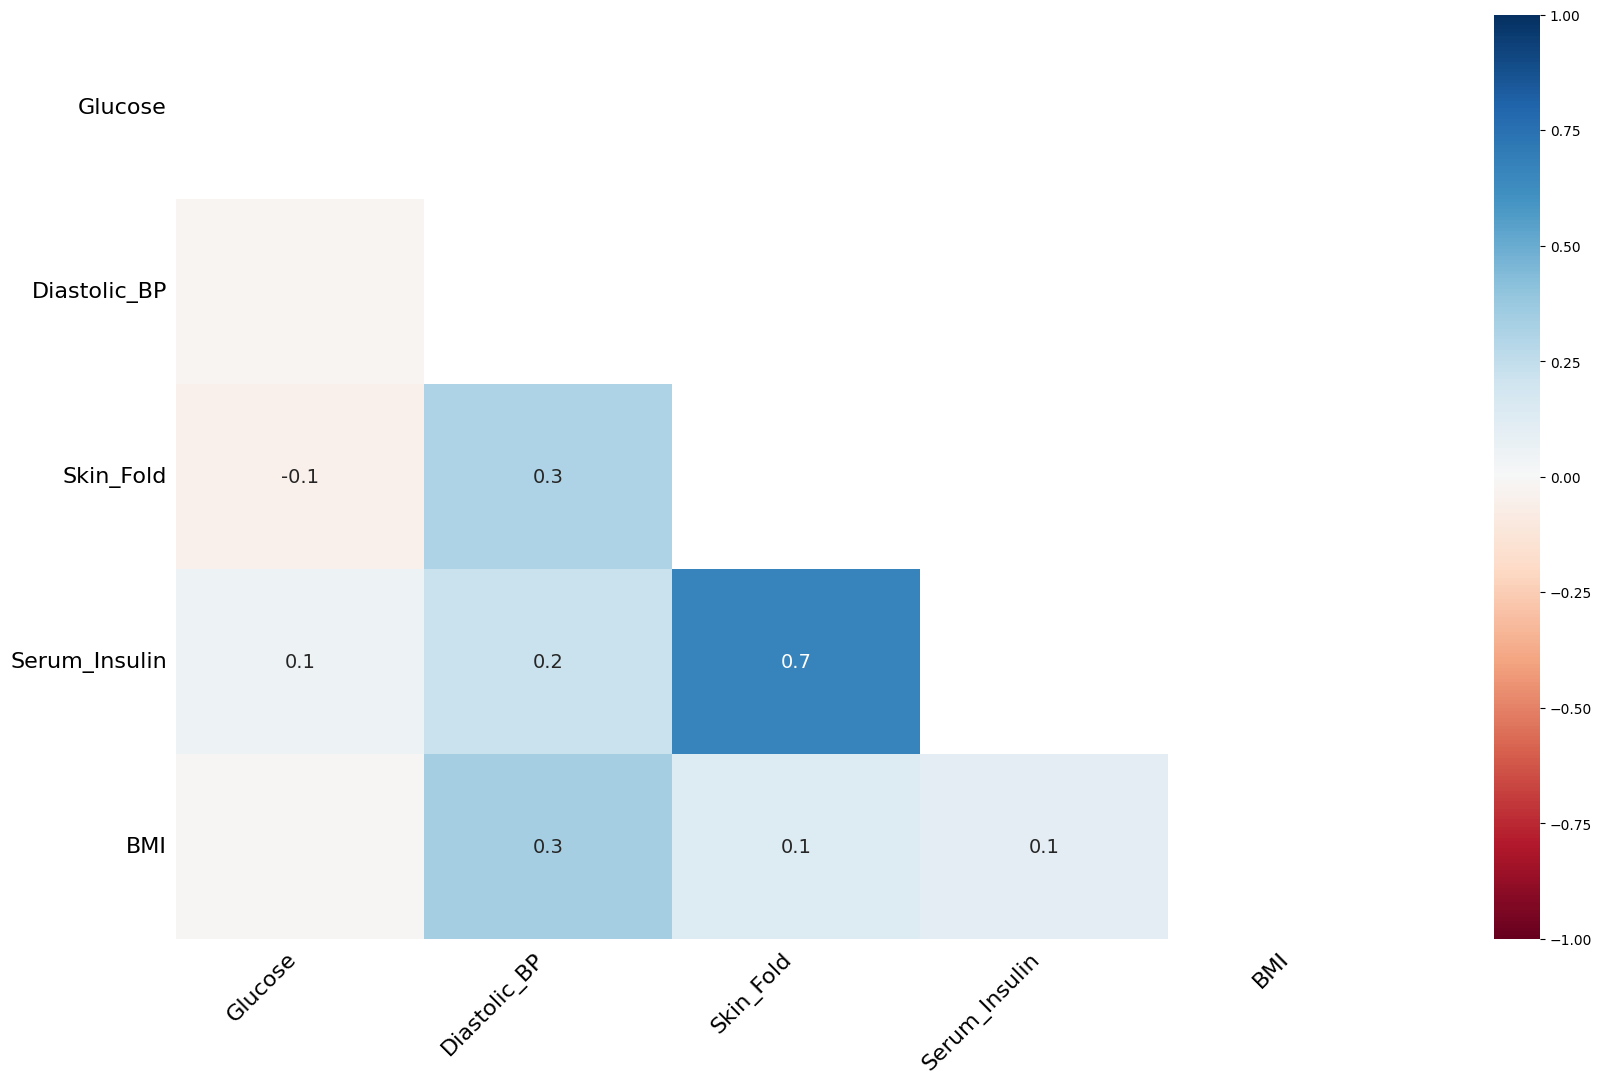

In [20]:
msno.heatmap(df)

In [21]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {
    column: LabelEncoder().fit(df[column])
    for column in df.select_dtypes(include=['object']).columns
}

for column, encoder in label_encoders.items():
    df[column] = encoder.transform(df[column])

df.head()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
%pip install missingpy
%pip install statsmodels

In [22]:
import numpy as np
from statsmodels.stats import weightstats as stests
from scipy.stats import chi2

def little_mcar_test(df):
    n = df.shape[0]
    n_miss = df.isnull().sum().sum()

    proportions_missing = df.isnull().mean()

    chi_square = (n_miss ** 2) / ((n - 1) * proportions_missing.sum())

    df_m = df.shape[1] - 1

    p_value = 1 - chi2.cdf(chi_square, df_m)

    return chi_square, p_value

chi_square, p_value = little_mcar_test(df)
print(f"Chi-Square Statistic: {chi_square}")
print(f"P-Value for MCAR test: {p_value}")

Chi-Square Statistic: 652.8500651890481
P-Value for MCAR test: 0.0


* P-value is 0 means, our missing data is **not MCAR**




# KNN Imputer to fill missing values

In [23]:
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer()
df_imputed_knn = pd.DataFrame(knn_imputer.fit_transform(df), columns=df.columns)
print(df_imputed_knn.head())

   Pregnant  Glucose  Diastolic_BP  Skin_Fold  Serum_Insulin   BMI  \
0       6.0    148.0          72.0       35.0          169.0  33.6   
1       1.0     85.0          66.0       29.0           58.6  26.6   
2       8.0    183.0          64.0       25.8          164.6  23.3   
3       1.0     89.0          66.0       23.0           94.0  28.1   
4       0.0    137.0          40.0       35.0          168.0  43.1   

   Diabetes_Pedigree   Age  Class  
0              0.627  50.0    1.0  
1              0.351  31.0    0.0  
2              0.672  32.0    1.0  
3              0.167  21.0    0.0  
4              2.288  33.0    1.0  


In [24]:
print(df_imputed_knn.isnull().sum())

Pregnant             0
Glucose              0
Diastolic_BP         0
Skin_Fold            0
Serum_Insulin        0
BMI                  0
Diabetes_Pedigree    0
Age                  0
Class                0
dtype: int64


# MissForest Imputer to fill missing values

In [13]:
# missingpy library is not working so we have used alternative
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.utils import resample

def custom_missforest(df, n_iterations=10):
    df_imputed = df.copy()

    for _ in range(n_iterations):
        for column in df_imputed.columns:
            if df_imputed[column].isnull().any():
                df_missing = df_imputed[df_imputed[column].isnull()]
                df_non_missing = df_imputed[df_imputed[column].notnull()]

                if df_non_missing.empty:
                    continue

                X_train = df_non_missing.drop(columns=column)
                y_train = df_non_missing[column]
                X_test = df_missing.drop(columns=column)

                X_train = X_train.fillna(X_train.mean())
                X_test = X_test.fillna(X_train.mean())

                if y_train.dtype == 'object' or df_imputed[column].dtype == 'object':
                    model = RandomForestClassifier(n_estimators=100)
                    model.fit(X_train, y_train)
                    df_imputed.loc[df_imputed[column].isnull(), column] = model.predict(X_test)
                else:
                    model = RandomForestRegressor(n_estimators=100)
                    model.fit(X_train, y_train)
                    df_imputed.loc[df_imputed[column].isnull(), column] = model.predict(X_test)

    return df_imputed

df_imputed_missforest = custom_missforest(df)

print("Imputed DataFrame:")
print(df_imputed_missforest)

Imputed DataFrame:
     Pregnant  Glucose  Diastolic_BP  Skin_Fold  Serum_Insulin   BMI  \
0           6    148.0          72.0      35.00         188.52  33.6   
1           1     85.0          66.0      29.00          49.82  26.6   
2           8    183.0          64.0      19.86         228.06  23.3   
3           1     89.0          66.0      23.00          94.00  28.1   
4           0    137.0          40.0      35.00         168.00  43.1   
..        ...      ...           ...        ...            ...   ...   
763        10    101.0          76.0      48.00         180.00  32.9   
764         2    122.0          70.0      27.00         179.52  36.8   
765         5    121.0          72.0      23.00         112.00  26.2   
766         1    126.0          60.0      26.21         148.62  30.1   
767         1     93.0          70.0      31.00          71.05  30.4   

     Diabetes_Pedigree  Age  Class  
0                0.627   50      1  
1                0.351   31      0  
2    

In [26]:
df_imputed_missforest.isnull().sum()

Pregnant             0
Glucose              0
Diastolic_BP         0
Skin_Fold            0
Serum_Insulin        0
BMI                  0
Diabetes_Pedigree    0
Age                  0
Class                0
dtype: int64

* Missing entries are imputed with estimated values predicted by random forest models. These predictions are made using other observed data from the dataset, allowing for more accurate estimates of missing values.

* Due to the inherent randomness in random forest models—particularly when using a bootstrap sampling approach for training individual trees—re-running the code multiple times may result in slight variations in the imputed values.

* Random forests handle missing data well due to their ability to leverage correlations between features, and the ensemble nature of the method helps provide robust estimates.

* Additionally, random forests can maintain the variability in the dataset, which is often lost with simpler imputation methods like mean or median replacement, leading to better data quality for downstream analysis.